#  Distance and Similarity Metrics, KNN, Kernel Smoothing
# By Vivian ZENG 09/02/2020

# Part One: Distance and Similarity Metrics

1. Load the Ames housing data. Create a matrix with the following variables and standardize the: Sale_Price, Lot_Area, Year_Built, Gr_Liv_Area, Total_Bsmt_SF, and Full_Bath. Randomly select five (5) rows from the matrix and print them.  (5 pts)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
cmap = sns.diverging_palette(220, 10, as_cmap=True)
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [123]:
ames = pd.read_csv('ames.csv')
cols = ['Sale_Price', 'Lot_Area', 'Year_Built', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'Full_Bath']
df = ames[cols].copy()
df = df.dropna()
X=df.values

In [124]:
np.random.seed(5)
scaler = StandardScaler()
X = scaler.fit_transform(X) # fit method calculates mean and sd for each column

In [125]:
np.random.seed(5)
idx = np.random.randint(X.shape[0], size=5)
X5 = X[idx, :].copy()
print(X5)

[[-0.51076121  0.41073899 -0.07791992 -0.27638344  0.11963083 -1.02479289]
 [-0.47320161 -0.22058561  0.0874229  -0.93721656 -0.18429795 -1.02479289]
 [ 0.5079803  -0.4960127   1.145617   -0.34761097  0.61861839  0.7840283 ]
 [ 0.84764426 -0.1019108   1.17868557  0.22814483  1.27864283  0.7840283 ]
 [-0.04126623  0.13975427  0.78186278 -0.59295021  0.33737086  0.7840283 ]]


2. Create distance matrices for these five (5) observations with the following metrics. Print each distance matrix. Which points are closest and farthest from each other? Are they the same with each metric? (15 pts) (Euclidean distance, Manhattan distance, Minkowski distance with p=0.5)

In [126]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels

Euclidean distance

In [135]:
eucli=pairwise_distances(X5, metric='euclidean')
print(eucli)

[[0.         0.97795339 2.62354179 2.925205   2.11010518]
 [0.97795339 0.         2.53426444 3.11763832 2.11214381]
 [2.62354179 2.53426444 0.         1.01926859 0.9886759 ]
 [2.925205   3.11763832 1.01926859 0.         1.60194325]
 [2.11010518 2.11214381 0.9886759  1.60194325 0.        ]]


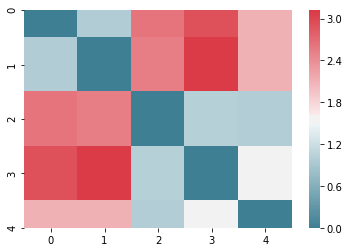

In [136]:
sns.heatmap(eucli, cmap=cmap) #red area stands for higher distance

Manhattan distance

In [129]:
manha=pairwise_distances(X5, metric='manhattan')
print(manha)

[[0.         1.79898892 5.52806638 6.60002221 3.94339038]
 [1.79898892 0.         5.51614621 6.9679067  4.16147147]
 [5.52806638 5.51614621 0.         2.00261468 2.07535448]
 [6.60002221 6.9679067  2.00261468 0.         3.28976536]
 [3.94339038 4.16147147 2.07535448 3.28976536 0.        ]]


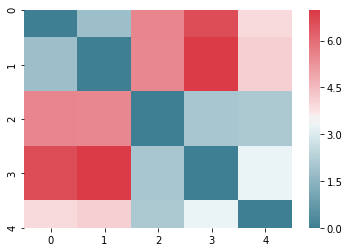

In [130]:
sns.heatmap(manha, cmap=cmap) #red area stands for higher distance

Minkowski distance

In [131]:
minko=pairwise_distances(X5, metric='minkowski', p=0.5)
print(minko)

[[ 0.          7.61318376 29.00789703 37.62946863 20.31482257]
 [ 7.61318376  0.         30.83449165 38.09817669 22.51278998]
 [29.00789703 30.83449165  0.          8.78313004 10.03132764]
 [37.62946863 38.09817669  8.78313004  0.         15.52902421]
 [20.31482257 22.51278998 10.03132764 15.52902421  0.        ]]


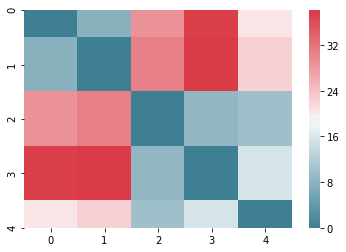

In [132]:
sns.heatmap(minko, cmap=cmap) #red area stands for higher distance

### ANSWER: All these three distance matrices show the closest points are the first elements on the second row and column with darker blue color squares, and farthest points are the first two elements on the forth row and column with darker red squares. In terms of distance comparison, the three matrices give the same results. However, their scales of x and y axies of the heatmap are different.

3. Create similarity matrices for these five (5) observations with the following kernels. Print each similarity matrix. Which points are most similar to each other? Are they the same with each kernel? Are they the same points that were closest in question two (2)? (15 pts)
(Gaussian kernel (use gamma = 1.0), Laplace kernel (use gamma = 1.0), Cosine kernel)

Gaussian kernel (use gamma = 1.0)

In [138]:
gau=pairwise_kernels(X5, metric='rbf', gamma=1.0).round(3)
gau

array([[1.   , 0.384, 0.001, 0.   , 0.012],
       [0.384, 1.   , 0.002, 0.   , 0.012],
       [0.001, 0.002, 1.   , 0.354, 0.376],
       [0.   , 0.   , 0.354, 1.   , 0.077],
       [0.012, 0.012, 0.376, 0.077, 1.   ]])

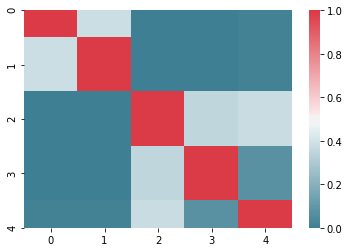

In [139]:
sns.heatmap(gau, cmap=cmap)

Laplace kernel(use gamma=1.0)

In [141]:
lap=pairwise_kernels(X5, metric='laplacian', gamma=1.0).round(3)
lap

array([[1.   , 0.165, 0.004, 0.001, 0.019],
       [0.165, 1.   , 0.004, 0.001, 0.016],
       [0.004, 0.004, 1.   , 0.135, 0.126],
       [0.001, 0.001, 0.135, 1.   , 0.037],
       [0.019, 0.016, 0.126, 0.037, 1.   ]])

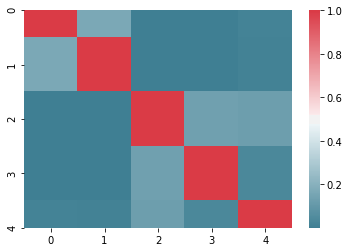

In [142]:
sns.heatmap(lap, cmap=cmap)

Cosine kernel

In [143]:
cos=pairwise_kernels(X5, metric='cosine').round(3)
cos

array([[ 1.   ,  0.761, -0.551, -0.485, -0.354],
       [ 0.761,  1.   , -0.243, -0.485, -0.129],
       [-0.551, -0.243,  1.   ,  0.877,  0.818],
       [-0.485, -0.485,  0.877,  1.   ,  0.648],
       [-0.354, -0.129,  0.818,  0.648,  1.   ]])

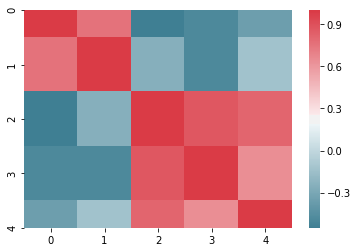

In [144]:
sns.heatmap(cos, cmap=cmap)

### ANSWER: All these three similarity matrices show the most similiar points are the first elements on the second row and column, and least similiar points are the first two elements on the forth row and column. These three matrices give the same results, and are consistent with question 2.

# Part Two: K-NN and Kernel Smoothing Methods

For this problem we will fit a K-nearest neighbor regression model and kernel smoothing regression model to predict the sales price (Sale_Price) of a home from the following variables: Lot_Area, Year_Built, Gr_Liv_Area, otal_Bsmt_SF, Full_Bath

In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from math import sqrt

1. Create a data matrix for the explanatory variables and vector for the response. Print the first few rows of the feature matrix. (5 pts)


In [3]:
ames = pd.read_csv('ames.csv')
cols = ['Sale_Price', 'Lot_Area', 'Year_Built', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'Full_Bath']
df = ames[cols].copy()
df = df.dropna()
y = df.Sale_Price.values 
X = df.drop('Sale_Price', axis=1).values  
X[:5, :]

array([[31770,  1960,  1656,  1080,     1],
       [11622,  1961,   896,   882,     1],
       [14267,  1958,  1329,  1329,     1],
       [11160,  1968,  2110,  2110,     2],
       [13830,  1997,  1629,   928,     2]])

2. Randomly split the data into 70% training and 30% test data. Print the dimensions of each matrix/vector. (5 pts)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (2051, 5)
y_train shape:  (2051,)
X_test shape:  (879, 5)
y_test shape:  (879,)


3. Standardize the training data and apply the same transformation to the test data. Print the first few rows of the training feature matrix. (10 pts)
Note: You do not need to standardize the response variable, Sale_Price.

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:5,])

[[ 0.08940132 -0.20356345 -0.68571107  0.20488523 -1.06980598]
 [-0.21291426  0.75372232 -0.06057701 -1.48213657  0.74056701]
 [ 0.13689057 -2.05211527 -0.45323934 -0.97383909 -1.06980598]
 [-0.29308297  0.75372232 -0.49231022  0.38673303  0.74056701]
 [ 0.14753893 -0.36861272  0.13868448  0.32319585 -1.06980598]]


4. Fit a K-nearest neighbor regression model on the training data using Euclidean distance. Use 5-fold cross validation to choose the best K in terms of RSME. Report the CV error for each choice of K considered. (20 pts)
Hint: Consider various values of K between 5 and 20. 

In [264]:
from sklearn.model_selection import cross_validate
Ks = np.arange(5, 21)
rmse1 = []
for k in Ks:
    knn = KNeighborsRegressor(n_neighbors=k, p=2)
    knncv = cross_validate(knn, X=X_train, y=y_train, cv=5, scoring='neg_root_mean_squared_error')
    rmse1.append(-knncv['test_score'].mean())

In [267]:
pd.DataFrame({'K':Ks, 'RMSE':rmse1})

,K,RMSE
0,5,36104.895066
1,6,35975.757617
2,7,35874.827484
3,8,36009.665300
4,9,36032.231312
5,10,35648.926220
6,11,35876.637491
7,12,35750.889265
8,13,35859.299405
9,14,35999.615361


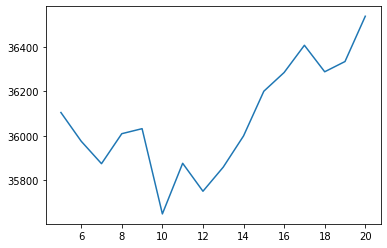

In [216]:
 plt.plot(ks, rmse1)

5. Implement and fit a kernel smoothed regression model using the Laplace kernel. Use 5-fold cross validation to choose the best tuning parameter gamma in terms of RSME. Report the average CV error for each choice of gamma considered. (20 pts)
Hint: Consider various values of gamma between 0.10 and 10.0.
You do not need to tune the number of neighbors; choose a large value for this and let gamma do the work. 

In [201]:
def laplacian(gamma):
    def kernel(distance):
        return np.exp(-gamma*distance)
    return kernel

In [243]:
from sklearn.model_selection import cross_validate
gammas = [0.1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rmse2 = []
for m in gammas:
    ks=KNeighborsRegressor(n_neighbors=500, p=1, weights=laplacian(m))
    kscv = cross_validate(ks, X=X_train, y=y_train, cv=5, scoring='neg_root_mean_squared_error')
    rmse2.append(-kscv['test_score'].mean())

In [248]:
pd.DataFrame({'Gamma':gammas, 'RMSE':rmse2})

,Gamma,RMSE
0,0.1,52482.448765
1,0.0,53295.188879
2,1.0,42299.358229
3,2.0,35373.529849
4,3.0,33687.109703
5,4.0,33654.273351
6,5.0,34089.208034
7,6.0,34616.805978
8,7.0,35119.659844
9,8.0,35573.279609


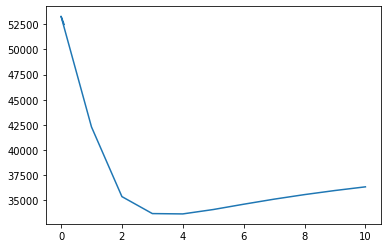

In [247]:
 plt.plot(gammas, rmse2)

6. Use the best K-NN model and the best kernel smoothed model to make predictions on the test data and report the RMSE and mean absolute error (MAE) from each. Which model would you prefer? Consider other constraints beyond prediction error. (5 pts)

Locate the best k and gamma

In [275]:
print('Best k:', Ks[np.argmin(rmse1)])
print('Best gamma:', gammas[np.argmin(rmse2)])

Best k: 10
Best gamma: 4


10

Make Predictions

In [276]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
ks = KNeighborsRegressor(n_neighbors=100, p=1, weights=laplacian(gamma=4))
ks.fit(X_train, y_train)
ks_preds = ks.predict(X_test)

Report the errors

In [279]:
print('KNN RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, knn_preds))))
print('KS RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(y_test, ks_preds))))
print('KNN MAE: {:.3f}'.format(mean_absolute_error(y_test, knn_preds)))
print('KS MAE: {:.3f}'.format(mean_absolute_error(y_test, ks_preds)))

KNN RMSE: 32446.159
KS RMSE: 30748.073
KNN MAE: 21118.996
KS MAE: 20453.004


According to the RMSE and MAE errors, I prefer to use the the kernel smoothing model because it gives better predictions with lower prediction errors. 